### Q1. A company conducted a survey of its employees and found that 70% of the employees use the company's health insurance plan, while 40% of the employees who use the plan are smokers. What is the probability that an employee is a smoker given that he/she uses the health insurance plan?

P(Smoker | Uses Health Insurance) = P(Smoker and Uses Health Insurance) / P(Uses Health Insurance)

Given,

* The probability that an employee uses the health insurance plan is 70%, which can be denoted as P(Uses Health Insurance) = 0.70.

* The probability that an employee who uses the plan is a smoker is 40%, which can be denoted as P(Smoker and Uses Health Insurance) = 0.40.

Now, you can calculate the conditional probability:

P(Smoker | Uses Health Insurance) = P(Smoker and Uses Health Insurance) / P(Uses Health Insurance)
P(Smoker | Uses Health Insurance) = 0.40 / 0.70
P(Smoker | Uses Health Insurance) ≈ 0.5714

So, the probability that an employee is a smoker given that he/she uses the health insurance plan is approximately 57.14%.

### Q2. What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?

Ans)**Bernoulli Naive Bayes** and **Multinomial Naive Bayes** are both variants of the Naive Bayes classification algorithm, but they differ primarily in the type of data they are designed to handle. Bernoulli Naive Bayes is suitable for binary or boolean features, meaning it works best when the data represents the presence or absence of features. For example, in text classification tasks like spam detection, Bernoulli Naive Bayes considers whether a particular word appears in a document or not, ignoring how many times it occurs. It uses the Bernoulli distribution to model the binary occurrence of features.

On the other hand, Multinomial Naive Bayes is used for data that involves discrete counts, making it ideal for tasks where the frequency of features matters. This variant is commonly applied in document classification, where the input features are typically word counts or term frequencies. Multinomial Naive Bayes uses the multinomial distribution to model the probability of word occurrences in a document, taking into account how often each word appears.

In summary, while Bernoulli Naive Bayes focuses on the presence or absence of features, Multinomial Naive Bayes focuses on the number of times features occur. The choice between the two depends on the nature of the input data and the problem at hand.

### Q3. How does Bernoulli Naive Bayes handle missing values?

Bernoulli Naive Bayes, like other Naive Bayes variants, is not well-suited to handling missing values in its standard form. The algorithm assumes that each feature is either present (1) or absent (0), and it relies on these binary values to calculate probabilities for classification.

When you have missing values in a Bernoulli Naive Bayes model, we can :

1. Impute Missing Values: You can fill in the missing values with a suitable imputation technique. For binary data, you might impute missing values with the most common value (0 or 1) or use more advanced imputation methods, such as k-Nearest Neighbors imputation or predictive modeling techniques. However, the choice of imputation method can affect the results, so it should be done carefully.

2. Remove Instances with Missing Values: Another approach is to remove instances (data points) that have missing values. This approach can work if the number of instances with missing values is relatively small and doesn't significantly impact the overall dataset. However, it can lead to a loss of information.

3. Encode Missing Values as a Separate Category: Instead of imputing missing values, you can encode them as a separate category (e.g., -1 or "missing"). This approach retains the information that a value is missing and allows the Naive Bayes classifier to consider it as a separate feature. However, you should be cautious about how you handle these missing value categories during probability calculations.

4. Modify the Algorithm: You could modify the Bernoulli Naive Bayes algorithm to handle missing values explicitly. This would involve adapting the probability calculations to account for missing values as a distinct category. However, this modification can be complex and might require redefining the basic assumptions of the Naive Bayes model.

In practice, the choice of how to handle missing values depends on the specific dataset and problem at hand. It's important to consider the impact of missing data on your classification results and choose the most appropriate approach based on your data and the goals of your analysis.

### Q4. Can Gaussian Naive Bayes be used for multi-class classification?

Yes, Gaussian Naive Bayes can be used for multi-class classification tasks. Gaussian Naive Bayes is a variant of the Naive Bayes algorithm that is specifically designed for continuous data where features are assumed to follow a Gaussian (normal) distribution. It can be adapted for multi-class classification by extending the basic binary classification setup.

Using Gaussian Naive Bayes for multi-class classification:

1. Data Preparation: Ensure that your dataset is appropriately prepared, and your features are continuous variables or can be approximated as continuous. If you have categorical features, you may need to convert them into continuous representations, such as using one-hot encoding.

2. Model Training: When using Gaussian Naive Bayes for multi-class classification, you will create a separate model for each class. For example, if you have K classes, you would train K separate Gaussian Naive Bayes models, each one corresponding to a different class.

3. Probability Estimation: In each model, you estimate the mean and variance of each feature for the instances belonging to that class. You assume that the features are normally distributed within each class. This estimation is typically done using the maximum likelihood method.

4. Class Prediction: To classify a new data point, you calculate the likelihood of the data point belonging to each class based on the Gaussian probability density function with the estimated mean and variance for each feature in that class. You then use Bayes' theorem to calculate the posterior probability of each class, given the observed data, and assign the class with the highest posterior probability as the predicted class for the data point.

In summary, Gaussian Naive Bayes can be used for multi-class classification by treating each class as a separate binary classification problem and using Gaussian probability density functions to model the feature distributions within each class. It's a simple and effective algorithm for multi-class classification when your data is continuous or can be reasonably approximated as such.

### Q5. Assignment:

* Data preparation:
Download the "Spambase Data Set" from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Spambase). This dataset contains email messages, where the goal is to predict whether a message is spam or not based on several input features.

* Implementation:
Implement Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes classifiers using the scikit-learn library in Python. Use 10-fold cross-validation to evaluate the performance of each classifier on the dataset. You should use the default hyperparameters for each classifier.

* Results:
Report the following performance metrics for each classifier: Accuracy Precision Recall F1 score

* Discussion:
Discuss the results you obtained. Which variant of Naive Bayes performed the best? Why do you think that is the case? Are there any limitations of Naive Bayes that you observed?

* Conclusion:
Summarise your findings and provide some suggestions for future work. Note: This dataset contains a binary classification problem with multiple features. The dataset is relatively small, but it can be used to demonstrate the performance of the different variants of Naive Bayes on a real-world problem.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [6]:
with open('spambase.names','r') as f:
    a = f.read()
    
print(a)

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [7]:
with open('spambase.DOCUMENTATION','r') as f:
    b = f.read()
    
print(b)

1. Title:  SPAM E-mail Database

2. Sources:
   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304
   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835
   (c) Generated: June-July 1999

3. Past Usage:
   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
   (b) Determine whether a given email is spam or not.
   (c) ~7% misclassification error.
       False positives (marking good mail as spam) are very undesirable.
       If we insist on zero false positives in the training/testing set,
       20-25% of the spam passed through the filter.

4. Relevant Information:
        The "spam" concept is diverse: advertisements for products/web
        sites, make money fast schemes, chain letters, pornography...
	Our collection of spam e-mails came from our postmaster and 
	individuals who had filed spam.  Our collection of non-spam 
	e-mails came from filed work a

In [8]:
df = pd.read_csv("spambase.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [9]:
df[57].value_counts()

0    2788
1    1813
Name: 57, dtype: int64

In [10]:
X = df.iloc[:,:-1]
y = df[57]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
X_train.shape , X_test.shape

((3450, 57), (1151, 57))

In [13]:
y_train.shape , y_test.shape

((3450,), (1151,))

In [14]:
# Initialize classifiers
bernoulli_nb = BernoulliNB()
multinomial_nb = MultinomialNB()
gaussian_nb = GaussianNB()

In [15]:
# Perform 10-fold cross-validation and compute mean accuracy
bernoulli_scores = cross_val_score(bernoulli_nb, X, y, cv=10, scoring='accuracy')
multinomial_scores = cross_val_score(multinomial_nb, X, y, cv=10, scoring='accuracy')
gaussian_scores = cross_val_score(gaussian_nb, X, y, cv=10, scoring='accuracy')

In [16]:
# Calculate mean accuracy for each classifier
mean_bernoulli_accuracy = bernoulli_scores.mean()
mean_multinomial_accuracy = multinomial_scores.mean()
mean_gaussian_accuracy = gaussian_scores.mean()

In [17]:
# Print the results
print("Bernoulli Naive Bayes Mean Accuracy:", mean_bernoulli_accuracy)
print("Multinomial Naive Bayes Mean Accuracy:", mean_multinomial_accuracy)
print("Gaussian Naive Bayes Mean Accuracy:", mean_gaussian_accuracy)

Bernoulli Naive Bayes Mean Accuracy: 0.8839380364047911
Multinomial Naive Bayes Mean Accuracy: 0.7863496180326323
Gaussian Naive Bayes Mean Accuracy: 0.8217730830896915


In [18]:
import seaborn as sns
def performance_metrics_calculation(xtest,ytest,model):
    y_pred= model.predict(xtest)
    print(f"Accuracy : {accuracy_score(ytest,y_pred)}")
    print("-----------------------------------------------")
    print(f"Classification Report: \n\n {classification_report(ytest,y_pred)}")
    print("-----------------------------------------------")
    print("Confusion Matrix :")
    value = confusion_matrix(ytest,y_pred)
    sns.heatmap(value,annot=True,fmt = ".1f")

Accuracy : 0.8827106863596872
-----------------------------------------------
Classification Report: 

               precision    recall  f1-score   support

           0       0.87      0.94      0.90       676
           1       0.90      0.80      0.85       475

    accuracy                           0.88      1151
   macro avg       0.89      0.87      0.88      1151
weighted avg       0.88      0.88      0.88      1151

-----------------------------------------------
Confusion Matrix :


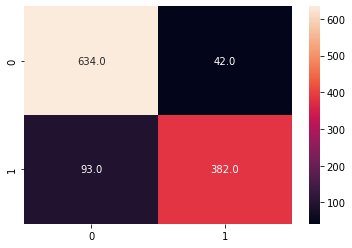

In [19]:
bernoulli_nb.fit(X_train,y_train)
performance_metrics_calculation(X_test,y_test,bernoulli_nb)

Accuracy : 0.7914856646394439
-----------------------------------------------
Classification Report: 

               precision    recall  f1-score   support

           0       0.81      0.85      0.83       676
           1       0.77      0.71      0.74       475

    accuracy                           0.79      1151
   macro avg       0.79      0.78      0.78      1151
weighted avg       0.79      0.79      0.79      1151

-----------------------------------------------
Confusion Matrix :


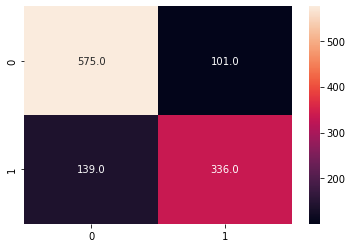

In [20]:
multinomial_nb.fit(X_train,y_train)
performance_metrics_calculation(X_test,y_test,multinomial_nb)

Accuracy : 0.8271068635968722
-----------------------------------------------
Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.74      0.83       676
           1       0.72      0.95      0.82       475

    accuracy                           0.83      1151
   macro avg       0.84      0.84      0.83      1151
weighted avg       0.86      0.83      0.83      1151

-----------------------------------------------
Confusion Matrix :


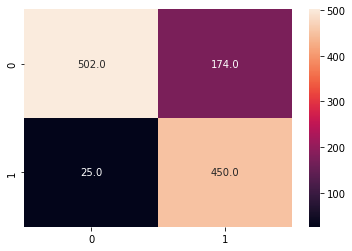

In [21]:
gaussian_nb.fit(X_train,y_train)
performance_metrics_calculation(X_test,y_test,gaussian_nb)

### Obervation :
* From the comparison of various Naive Bayes algorithms we found out that Bernoulli NB is the best performing compared to Multinomial and Guassian NB.
* The accuracy of the Bernoulli NB,Multinomial and Guassian NB after applying 10 fold cross validation is 88.39 , 78.63 and 82.17 respectively

### Limitation of Naive Bayes:


1. Assumption of Independence: Naive Bayes assumes that all features are conditionally independent given the class label. In reality, this independence assumption may not hold, and features might be correlated. This can lead to suboptimal results, especially when dealing with complex data.


2. Sensitivity to Feature Distribution: Naive Bayes methods, especially Gaussian Naive Bayes, assume that features follow specific probability distributions (e.g., Gaussian, Bernoulli, or Multinomial). If this assumption doesn't match the actual data distribution, the model's performance can be negatively affected.


3. Difficulty with Continuous Features: In practice, Gaussian Naive Bayes can struggle with continuous features because it assumes a Gaussian distribution for each feature. If the data doesn't follow this distribution, the model might not perform well.


4. Zero Frequency Problem: In Multinomial Naive Bayes and Bernoulli Naive Bayes, if a feature-class combination has zero occurrences in the training data, it can lead to zero probabilities when applying Bayes' theorem. This issue can be addressed with smoothing techniques like Laplace smoothing.


5. Data Imbalance: When dealing with imbalanced datasets (where one class significantly outnumbers another), Naive Bayes can be biased towards the majority class, as it assumes all classes are equally likely a priori.


6. Lack of Feature Importance: Naive Bayes doesn't provide feature importance scores directly. Other algorithms like decision trees or gradient boosting models can offer more insights into which features are most influential in making predictions.


7. Sensitive to Irrelevant Features: Naive Bayes can be sensitive to irrelevant features in the dataset. Even though it assumes independence, irrelevant features can still affect the model's performance.


8. Difficulty Handling Missing Data: Naive Bayes doesn't handle missing data well, especially in the Gaussian variant, which relies on estimating mean and variance. Missing data can lead to incorrect probability estimates.


9. Limited Support for Text Data: While Multinomial Naive Bayes is commonly used for text classification, it doesn't capture the semantic meaning of words or the order of words in a document. More advanced techniques like word embeddings or deep learning are better suited for natural language processing tasks.


* Despite these limitations, Naive Bayes can still be a valuable and computationally efficient choice for certain types of classification problems, especially when the independence assumption aligns with the data and the dataset is not too complex.